# **FRA501-HW2-CHAPTER02 Report**

Authors
- 64340500035 Napassorn Techasombooranakit
- 64340500049 Wasupol Hengsritawat

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import evaluation as evaluation

### Name Dataset: IBM HR Analytics Employee Attrition & Performance


For each employee, 34 features are provided. We will use these features to predict each employee's "attrition".
- **Attrition == Yes:** leaving the company
- **Attrition == No:** staying in the company


**Notable feature:**

- **Education:** 1 ’Below College’, 2 ’College’, 3 ’Bachelor’, 4 ’Master’, 5 ’Doc- tor’. 
- **Environment Satisfaction:** 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’. 
- **Job Involvement:** 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’. 
- **Job Satisfaction:** 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’. 
- **Performance Rating:** 1 ’Low’, 2 ’Good’, 3 ’Excellent’, 4 ’Outstanding’. 
- **Relationship Satisfaction:** 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’. 
- **WorkLifeBalance:** 1 ’Bad’, 2 ’Good’, 3 ’Better’, 4 ’Best’. 

Import dataset form file "hr_employee.csv" (IBM HR Analytics Employee Attrition & Performance)

In [2]:
df_all = pd.read_csv('hr_employee.csv')
df_all.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


Label all column features that are numerical features or categorical features for easy use and visualization.

In [3]:
numaric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PerformanceRating','StandardHours','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
cat_cols = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','Over18','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','Attrition']


Convert target variable in "Attrition" feature that is string "No", "Yes" to number 0 and 1

In [4]:
df_all.loc[df_all["Attrition"] == "No", "Attrition"] = 0.0 
df_all.loc[df_all["Attrition"] == "Yes", "Attrition"] = 1.0 
df_all.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,1.0,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,0.0,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,1.0,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,0.0,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,0.0,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


Convert each categorical feature to number

In [5]:
for col in cat_cols: 
    df_all[col] = pd.Categorical(df_all[col]).codes 

df_all.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,1,2,NaN,-1,1.0,-1,1,1.0,...,0,80.0,0,8.0,0.0,-1,6.0,NaN,0.0,NaN
1,1,NaN,0,-1,279.0,1,NaN,-1,1,1.0,...,3,NaN,1,10.0,NaN,2,10.0,NaN,NaN,7.0
2,2,37.0,1,-1,1373.0,-1,2.0,1,-1,1.0,...,-1,80.0,0,7.0,3.0,-1,NaN,0.0,NaN,0.0
3,3,NaN,0,1,1392.0,1,3.0,3,1,NaN,...,2,NaN,-1,8.0,3.0,-1,8.0,NaN,3.0,0.0
4,4,27.0,0,2,591.0,1,2.0,0,3,1.0,...,3,80.0,1,6.0,NaN,2,2.0,2.0,2.0,NaN


drop some features is "EmployeeNumber" and "Unnamed: 0"

In [6]:
df_all = df_all.drop('EmployeeNumber', axis=1)
df_all = df_all.drop('Unnamed: 0', axis=1)
df_all.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,2,NaN,-1,1.0,-1,1,1.0,1,...,0,80.0,0,8.0,0.0,-1,6.0,NaN,0.0,NaN
1,NaN,0,-1,279.0,1,NaN,-1,1,1.0,2,...,3,NaN,1,10.0,NaN,2,10.0,NaN,NaN,7.0
2,37.0,1,-1,1373.0,-1,2.0,1,-1,1.0,-1,...,-1,80.0,0,7.0,3.0,-1,NaN,0.0,NaN,0.0
3,NaN,0,1,1392.0,1,3.0,3,1,NaN,-1,...,2,NaN,-1,8.0,3.0,-1,8.0,NaN,3.0,0.0
4,27.0,0,2,591.0,1,2.0,0,3,1.0,0,...,3,80.0,1,6.0,NaN,2,2.0,2.0,2.0,NaN


Visualization number of each attribute in the feature 'Attrition' and this graph represents the number of "staying"(0) more than "leaving"(1) quite a lot more.

Attrition
0    1233
1     237
Name: count, dtype: int64


<Axes: xlabel='Attrition'>

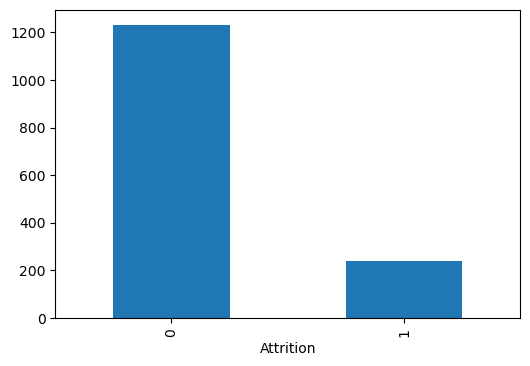

In [7]:
print(df_all['Attrition'].value_counts())
%matplotlib inline
GroupedData=df_all.groupby('Attrition').size()
GroupedData.plot(kind='bar', figsize=(6,4))

Segment data into training and test sets. But for now, let’s use 90% training and 10% testing. Select 10% from the “Attrition == yes” and 10% from the “Attrition == no” as a testing set.

In [8]:
df_all_shuffled = df_all.sample(frac=1, random_state=42)

attrition_yes = df_all_shuffled[df_all_shuffled['Attrition'] == 1]
attrition_no = df_all_shuffled[df_all_shuffled['Attrition'] == 0]

test_size_yes = int(len(attrition_yes) * 0.1)
test_size_no = int(len(attrition_no) * 0.1)

test_set_yes = attrition_yes.iloc[:test_size_yes]
train_set_yes = attrition_yes.iloc[test_size_yes:]

test_set_no = attrition_no.iloc[:test_size_no]
train_set_no = attrition_no.iloc[test_size_no:]

test_set = pd.concat([test_set_yes, test_set_no])
train_set = pd.concat([train_set_yes, train_set_no])

train_set = train_set.sample(frac=1, random_state=42)
test_set = test_set.sample(frac=1, random_state=42)

Check shape of training set (90%) and testing set (10%)

In [9]:
print("Training set head:", train_set.shape)
print("Testing set head:", test_set.shape)

Training set head: (1324, 34)
Testing set head: (146, 34)


## **Histogram discretization**

#### **1. Observe the histogram** for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

Check NaN value all column

In [10]:
nan_in_df = train_set.isna().any(axis=1).sum()
print('Number of NaN values: ' + str(nan_in_df))

Number of NaN values: 1287


Polt histogram with column 'Age', 'MonthlyIncome' and 'DistanceFromHome'

Number of bins with zero counts for Age: 0
Number of bins with zero counts for MonthlyIncome: 0
Number of bins with zero counts for DistanceFromHome: 11


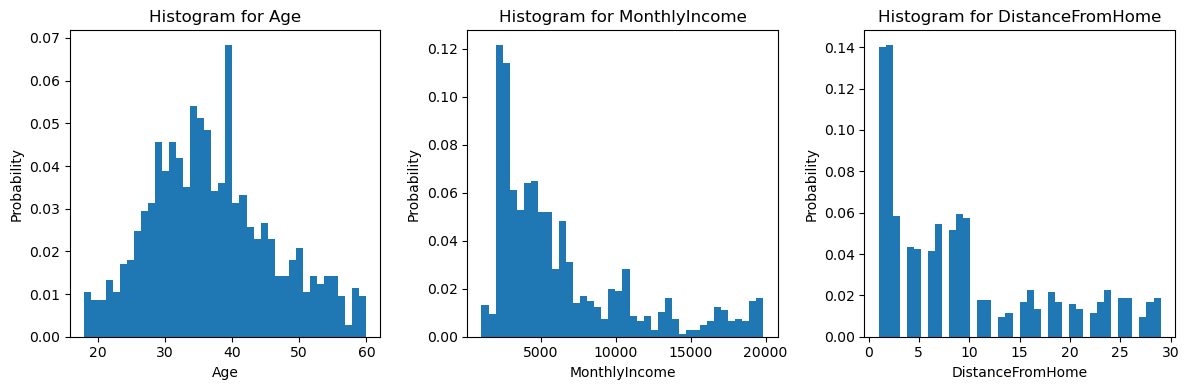

In [11]:
# Define the columns for plot histograms
columns_to_plot = ['Age', 'MonthlyIncome', 'DistanceFromHome']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(12, 4))

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    # Calculate histogram and drop NaN value of each column
    hist, bin_edge = np.histogram(train_set[column].dropna(), bins=40)
    
    # Normalize the histogram to get probabilities
    probabilities = hist / np.sum(hist)
    
    # Plot the histogram on the corresponding subplot
    axes[i].bar(bin_edge[:-1], probabilities, width=np.diff(bin_edge), align='edge')
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Probability')
    
    # Count bins with zero counts
    zero_count_bins = sum(hist == 0)
    print(f'Number of bins with zero counts for {column}: {zero_count_bins}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of bins with zero counts for Age: 0
Number of bins with zero counts for MonthlyIncome: 0
Number of bins with zero counts for DistanceFromHome: 11


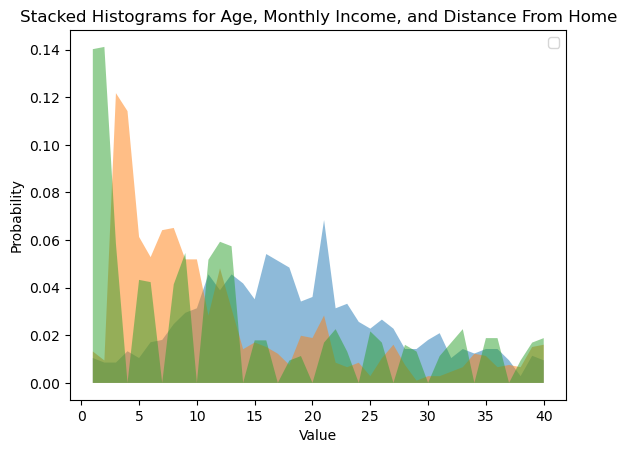

In [12]:
# Define the columns for which you want to plot histograms
columns_to_plot = ['Age', 'MonthlyIncome', 'DistanceFromHome']

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    # Calculate histogram
    hist, bin_edge = np.histogram(train_set[column].dropna(), bins=40)
    
    # Normalize the histogram to get probabilities
    probabilities = hist / np.sum(hist)
    
    # Plot the histogram on the corresponding subplot)
    plt.fill_between(np.linspace(1,40,40),probabilities,alpha=0.5)
    
    # Count bins with zero counts
    zero_count_bins = sum(hist == 0)
    print(f'Number of bins with zero counts for {column}: {zero_count_bins}')

plt.title('Stacked Histograms for Age, Monthly Income, and Distance From Home')
plt.xlabel('Value')
plt.ylabel('Probability')
# Adjust layout and show plot
plt.legend() 
plt.show()
# np.linspace(1,41,40)

From the histogram graph, when plotting the data for 'Age', 'MonthlyIncome', and 'DistanceFromHome', it can be observed that the histograms for 'Age' and 'MonthlyIncome' do not have any bins with zero counts or lack data in those ranges. However, the histogram for 'DistanceFromHome' has 11 bins with counts of zero.

The appropriateness of setting the number of bins depends on the data for each feature. From the histogram of 'DistanceFromHome', it can be considered a bad discretization due to the significant number of bins with zero counts, indicating that is not a normal distribution and does not accurately represent the data. On the other hand, the histograms for 'Age' and 'MonthlyIncome' can be considered good discretizations as they do not have bins with zero counts.

#### **2. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?**
**Note** : Bin each values in the training set into bins using the function np.digitize, then count the
number in each bins using np.bincount. Be careful with the maximum and minimum values, your first
bin should cover $−inf$, and your final bin should cover $inf$, so that you can handle test data that might be
outside of the minimum and maximum values.


Since age exhibits a distinct single mean with a symmetric bell-shaped distribution, it is appropriate to estimate the age probability distribution using a Gaussian distribution. On the other hand, monthly income and distance from home show that both distributions are skewed and contain more than one mean, suggesting that a Gaussian mixture model should be considered for a more accurate estimation than using a single Gaussian distribution. However, due to the skewness, it is still not expected to yield very good results.

#### **3. Now plot the histogram according to the method described above (with 10, 40, and 100 bins)** and  show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible  for each feature? Why? 

Number of bins with zero counts for Age (Bins: 10): 0
Number of bins with zero counts for Age (Bins: 40): 0
Number of bins with zero counts for Age (Bins: 100): 57
Number of bins with zero counts for MonthlyIncome (Bins: 10): 0
Number of bins with zero counts for MonthlyIncome (Bins: 40): 0
Number of bins with zero counts for MonthlyIncome (Bins: 100): 4
Number of bins with zero counts for DistanceFromHome (Bins: 10): 0
Number of bins with zero counts for DistanceFromHome (Bins: 40): 11
Number of bins with zero counts for DistanceFromHome (Bins: 100): 71


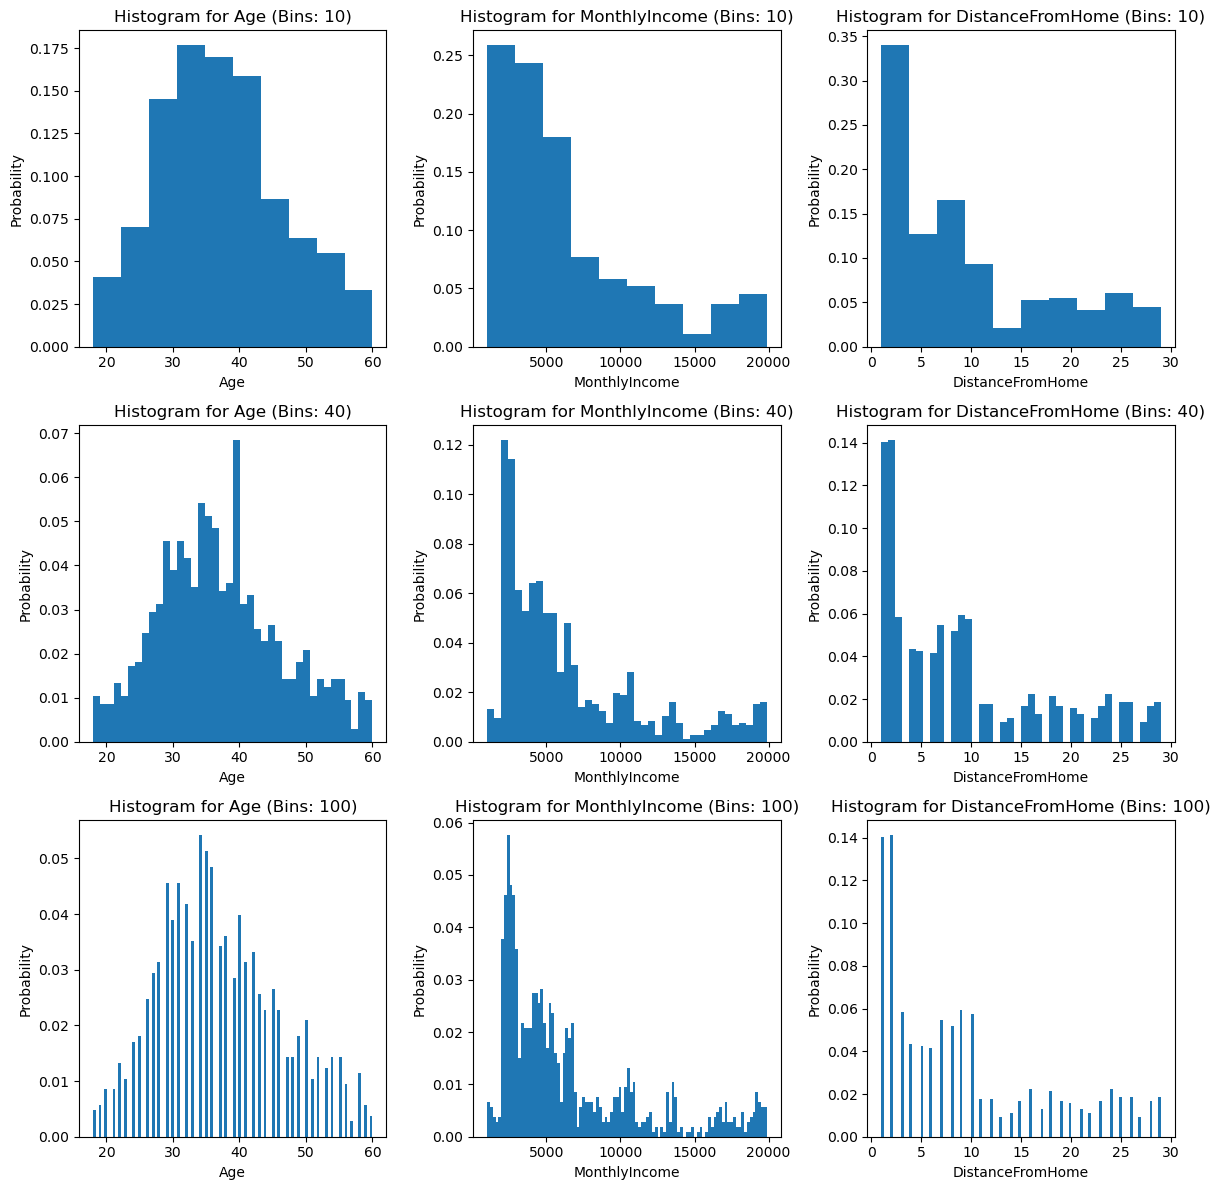

In [14]:
# Define the columns for which you want to plot histograms
columns_to_plot = ['Age', 'MonthlyIncome', 'DistanceFromHome']
num_bins = [10, 40, 100]

fig, axes = plt.subplots(len(num_bins), len(columns_to_plot), figsize=(12, 12))

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    for j, bin_count in enumerate(num_bins):
        # Calculate histogram
        hist, bin_edges = np.histogram(train_set[column].dropna(), bins=bin_count)
        
        # Normalize the histogram to get probabilities
        probabilities = hist / np.sum(hist)
        
        # Plot the histogram on the corresponding subplot
        axes[j, i].bar(bin_edges[:-1], probabilities, width=np.diff(bin_edges), align='edge')
        axes[j, i].set_title(f'Histogram for {column} (Bins: {bin_count})')
        axes[j, i].set_xlabel(column)
        axes[j, i].set_ylabel('Probability')
        
        # Count bins with zero counts
        zero_count_bins = np.sum(hist == 0)
        print(f'Number of bins with zero counts for {column} (Bins: {bin_count}): {zero_count_bins}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

When plotting the graphs for 'Age', 'MonthlyIncome', and 'DistanceFromHome' with varying numbers of bins (10, 40, and 100), it is evident that the suitable number of bins for 'Age' and 'MonthlyIncome' is 40. This is because there are no bins with zero counts. However, using 100 bins leads to having a considerable number of bins with zero counts. Conversely, with 10 bins, the data resolution is notably lower, resulting in an inadequate representation of the data.

For the 'DistanceFromHome' feature, the appropriate number of bins is 10. Increasing the number of bins to 40 or 100 results in a significant number of bins with zero counts. Specifically, with 40 bins, there are 11 bins with zero counts, and with 100 bins, there are 71 bins with zero counts. This leads to missing intervals in the data, indicating the poor number of bins.

#### **4. For the rest of the features (Numeric and Category)**, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? 

For the remaining features, such as 'TotalWorkingYears,' 'TrainingTimesLastYear,' 'YearsAtCompany,' and others, discretization is recommended in order to model them using histograms. The criteria for deciding whether to discretize a feature or not include:

1. Nature of the Feature: If a numeric feature has a wide range of values and lacks clear patterns when visualized, discretization may be advantageous. Discretization can assist in effectively representing the data.

2. Interpretability: Discretizing features can improve interpretability by creating intuitive bins or categories that are easier to understand.


To enable the selection of features for model creation, the following methods are employed:

1. **ANOVA** is utilized for selecting numerical features.
2. **Chi-Square** is employed for selecting categorical features.

In [15]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        # CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        # AnovaResults = f_oneway(*CategoryGroupLists)
        # Drop NaN values from the predictor variable
        predictor_data = inpData[predictor].dropna()
        # Group by target variable and predictor
        CategoryGroupLists = predictor_data.groupby(inpData[TargetVariable]).apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print('PASS ||',predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print('FAIL ||',predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [16]:
# Calling the function to check which categorical variables are correlated with target
FunctionAnova(inpData=train_set, TargetVariable='Attrition', ContinuousPredictorList=numaric_cols)

##### ANOVA Results ##### 

PASS || Age is correlated with Attrition | P-Value: 3.113063908649933e-07
FAIL || DailyRate is NOT correlated with Attrition | P-Value: 0.2868300885020424
PASS || DistanceFromHome is correlated with Attrition | P-Value: 0.011232456063350289
FAIL || EmployeeCount is NOT correlated with Attrition | P-Value: nan
FAIL || HourlyRate is NOT correlated with Attrition | P-Value: 0.7066204994605894
PASS || MonthlyIncome is correlated with Attrition | P-Value: 1.4514892261966045e-08
FAIL || MonthlyRate is NOT correlated with Attrition | P-Value: 0.6214253955213456
FAIL || NumCompaniesWorked is NOT correlated with Attrition | P-Value: 0.056577473062316794
FAIL || PerformanceRating is NOT correlated with Attrition | P-Value: 0.9346378000711721
FAIL || StandardHours is NOT correlated with Attrition | P-Value: nan
PASS || TotalWorkingYears is correlated with Attrition | P-Value: 5.642931088642426e-07
PASS || TrainingTimesLastYear is correlated with Attrition | P-Value: 0.

c:\Anaconda\lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

Features were selected using ANOVA, with the following numerical features chosen:

- 'Age'
- 'DistanceFromHome'
- 'MonthlyIncome'
- 'TotalWorkingYears'
- 'TrainingTimesLastYear'
- 'YearsAtCompany'
- 'YearsInCurrentRole'
- 'YearsWithCurrManager'

Number of bins with zero counts for Age: 0
Number of bins with zero counts for DailyRate: 0
Number of bins with zero counts for DistanceFromHome: 0
Number of bins with zero counts for EmployeeCount: 19
Number of bins with zero counts for HourlyRate: 0
Number of bins with zero counts for MonthlyIncome: 0
Number of bins with zero counts for MonthlyRate: 0
Number of bins with zero counts for NumCompaniesWorked: 10
Number of bins with zero counts for PerformanceRating: 17
Number of bins with zero counts for StandardHours: 19
Number of bins with zero counts for TotalWorkingYears: 0
Number of bins with zero counts for TrainingTimesLastYear: 13
Number of bins with zero counts for YearsAtCompany: 0
Number of bins with zero counts for YearsInCurrentRole: 1
Number of bins with zero counts for YearsSinceLastPromotion: 4
Number of bins with zero counts for YearsWithCurrManager: 2


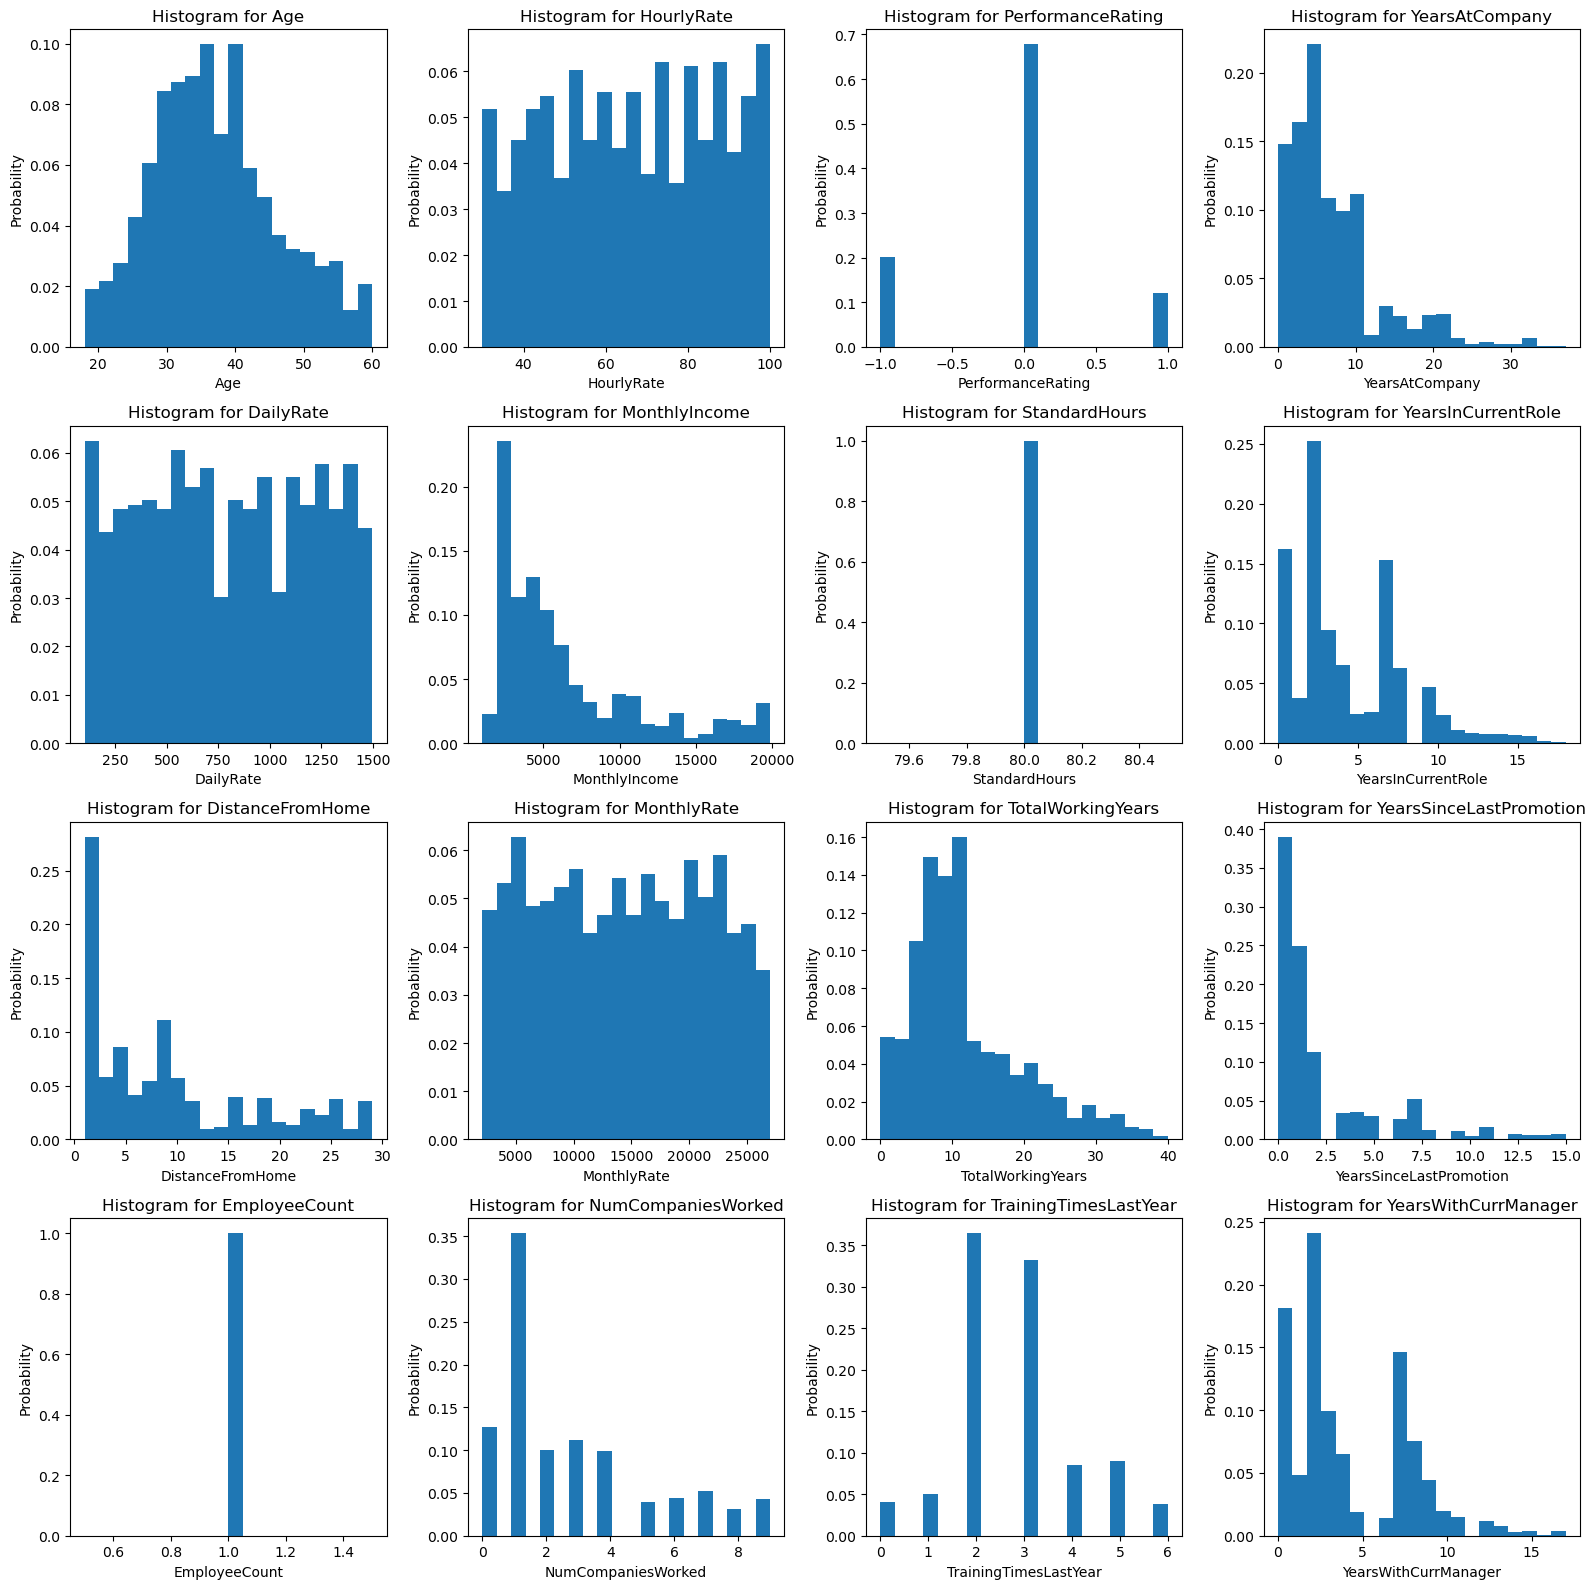

In [17]:
fig, axes = plt.subplots(int(len(numaric_cols)/4), int(len(numaric_cols)/4), figsize=(16, 16))
j = 0
k = 0
# Plot histograms for each column
for i, column in enumerate(numaric_cols):
    # Calculate histogram
    hist, bin_edge = np.histogram(train_set[column].dropna(), bins=20)
    
    # Normalize the histogram to get probabilities
    probabilities = hist / np.sum(hist)
    
    # Plot the histogram on the corresponding subplot
    axes[j, k].bar(bin_edge[:-1], probabilities, width=np.diff(bin_edge), align='edge')
    axes[j, k].set_title(f'Histogram for {column}')
    axes[j, k].set_xlabel(column)
    axes[j, k].set_ylabel('Probability')
    
    j = j+1
    if j == 4:
        k = k+1
        j = 0
    
    # plt.bar(bin_edge[:-1], probabilities, width=np.diff(bin_edge), align='edge')
    
    # Count bins with zero counts
    zero_count_bins = sum(hist == 0)
    print(f'Number of bins with zero counts for {column}: {zero_count_bins}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Number of bins with zero counts for Age: [0, 0, 0, 0, 0, 7, 17, 27, 37, 47, 57]
Number of bins with zero counts for DistanceFromHome: [0, 0, 0, 1, 11, 21, 31, 41, 51, 61, 71]
Number of bins with zero counts for MonthlyIncome: [0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 4]
Number of bins with zero counts for TotalWorkingYears: [0, 0, 0, 1, 1, 11, 21, 31, 41, 51, 61]
Number of bins with zero counts for TrainingTimesLastYear: [0, 3, 13, 23, 33, 43, 53, 63, 73, 83, 93]
Number of bins with zero counts for YearsAtCompany: [0, 0, 0, 3, 6, 16, 26, 36, 46, 56, 66]
Number of bins with zero counts for YearsInCurrentRole: [0, 0, 1, 11, 21, 31, 41, 51, 61, 71, 81]
Number of bins with zero counts for YearsWithCurrManager: [0, 0, 2, 12, 22, 32, 42, 52, 62, 72, 82]


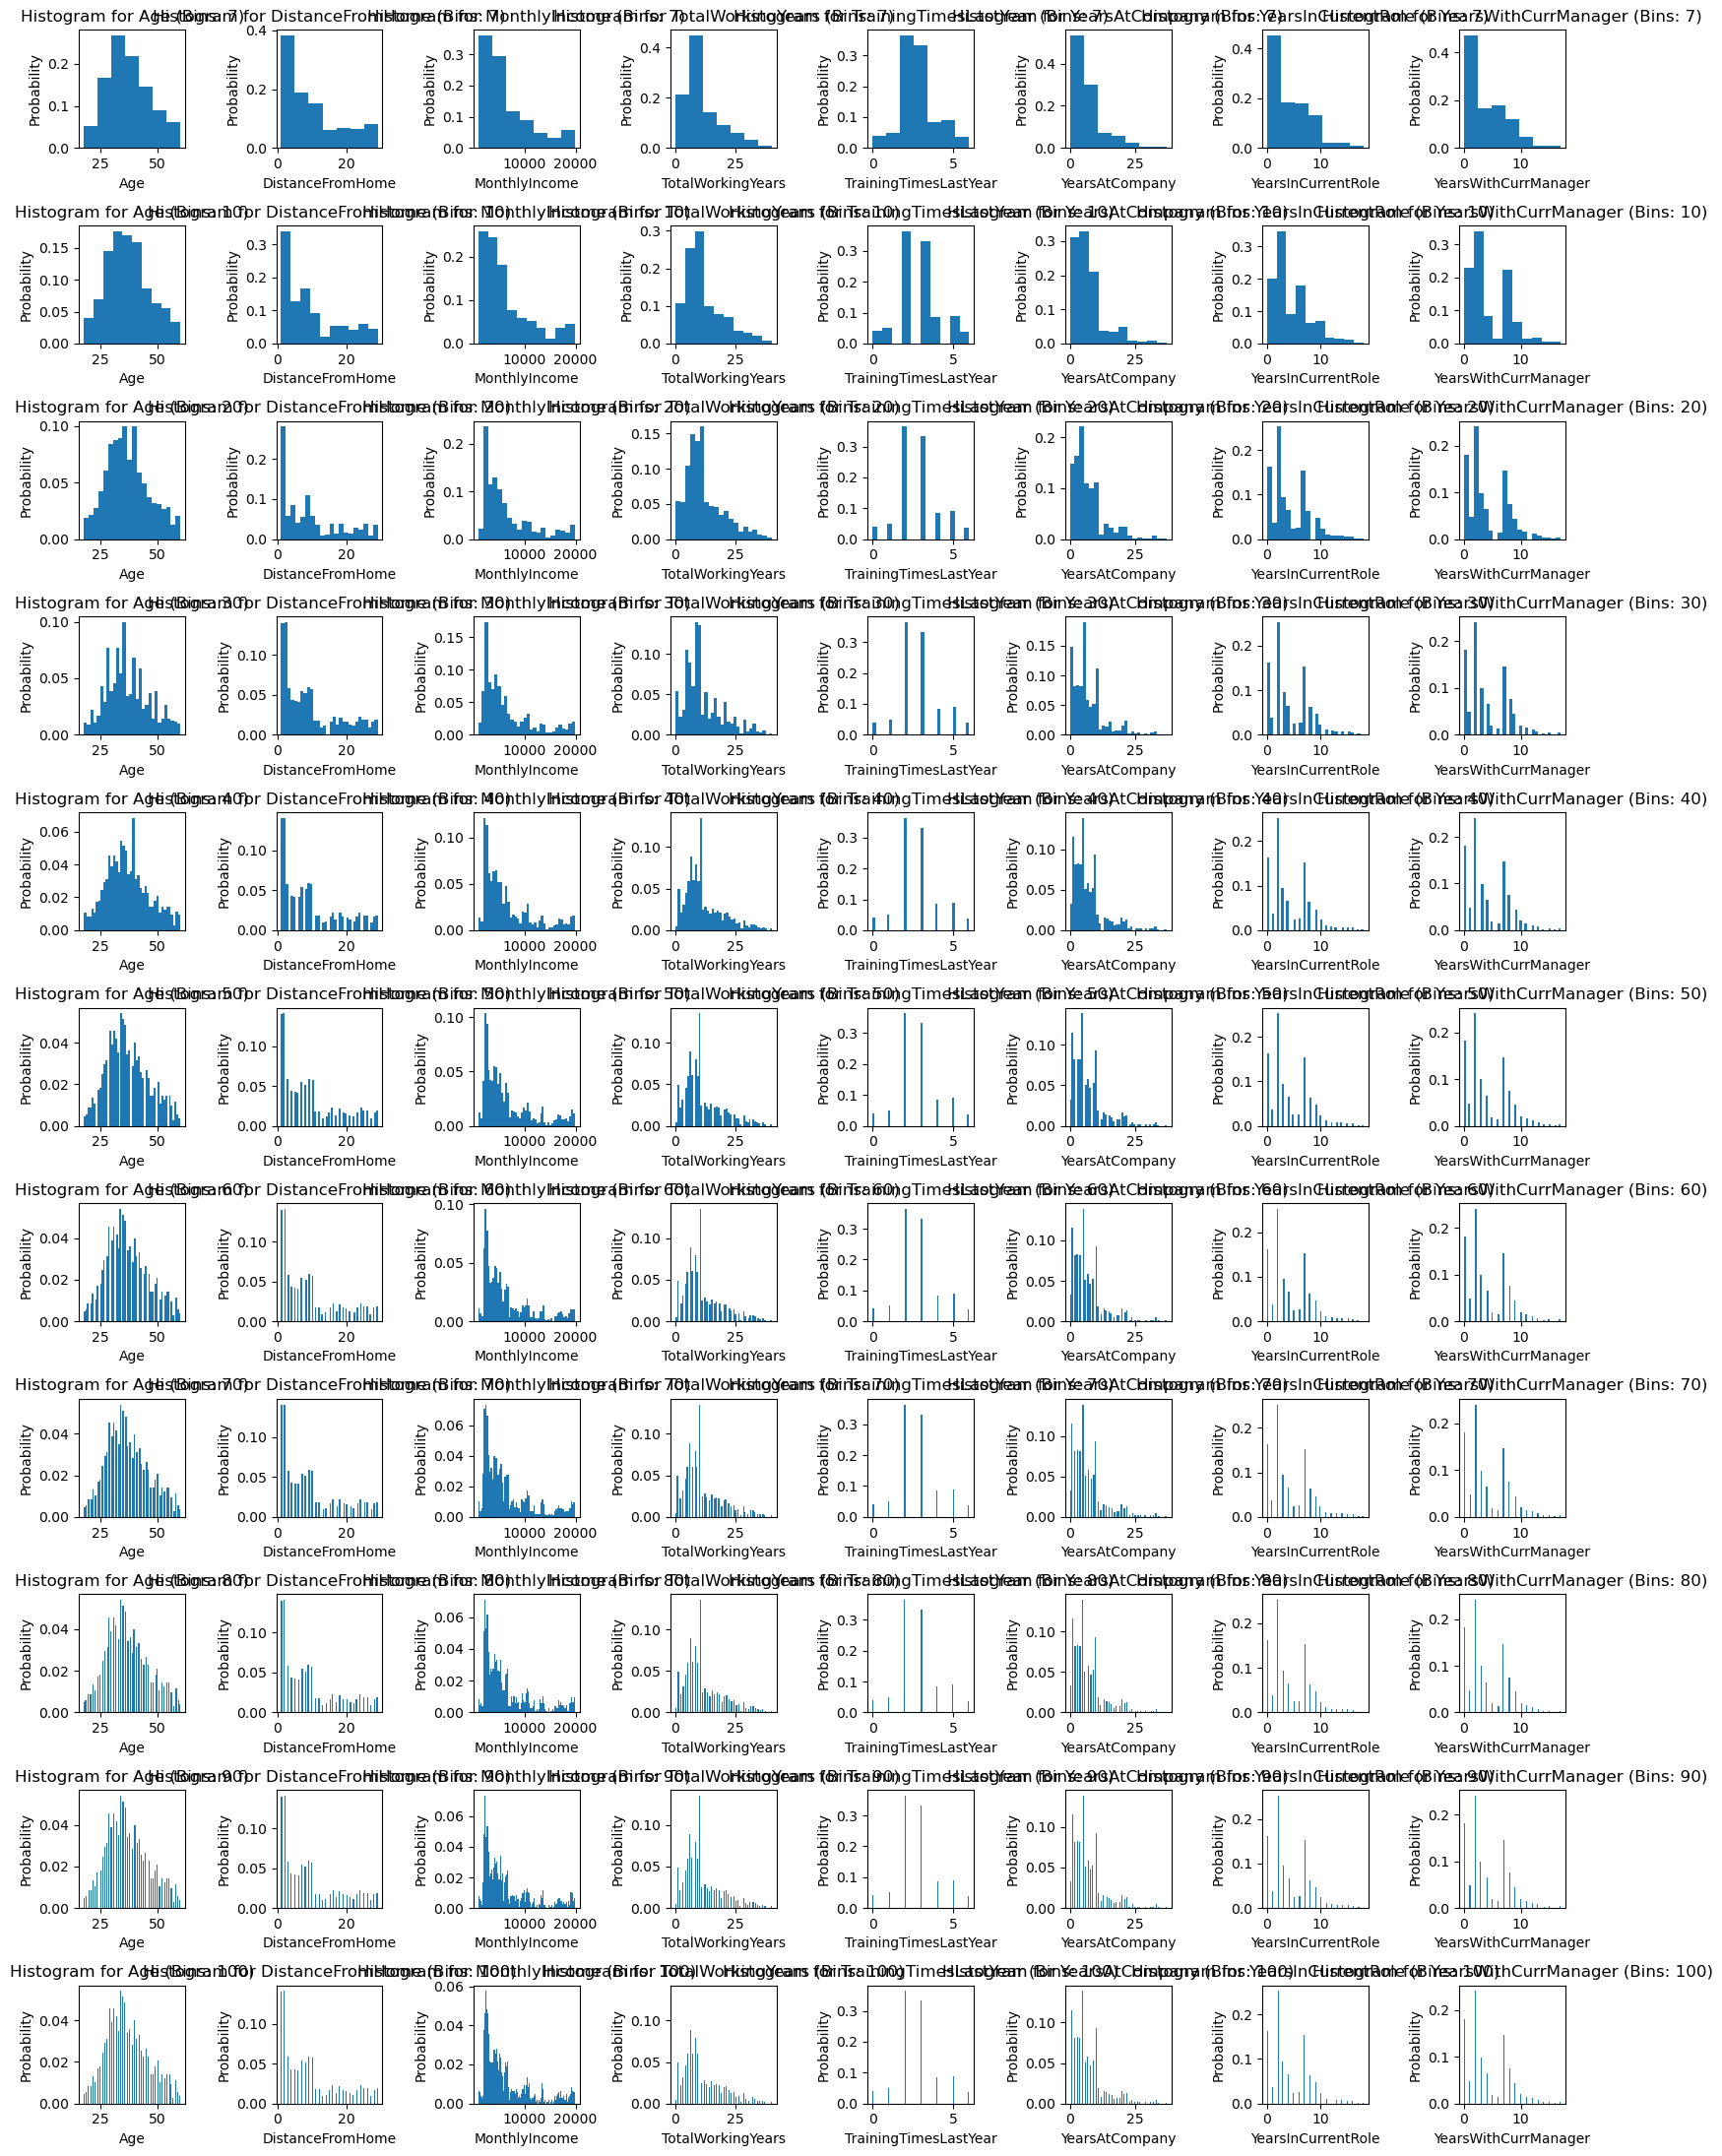

In [18]:
use_numaric_cols = ['Age','DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
num_bins = [7,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

fig, axes = plt.subplots(int(len(num_bins)), int(len(use_numaric_cols)), figsize=(16, 22))
j = 0
k = 0
# Plot histograms for each column
for i, column in enumerate(use_numaric_cols):
    bin = []
    for j, bin_count in enumerate(num_bins):
        # Calculate histogram
        hist, bin_edges = np.histogram(train_set[column].dropna(), bins=bin_count)
        
        # Normalize the histogram to get probabilities
        probabilities = hist / np.sum(hist)
        
        # Plot the histogram on the corresponding subplot
        axes[j, i].bar(bin_edges[:-1], probabilities, width=np.diff(bin_edges), align='edge')
        axes[j, i].set_title(f'Histogram for {column} (Bins: {bin_count})')
        axes[j, i].set_xlabel(column)
        axes[j, i].set_ylabel('Probability')
        
        # Count bins with zero counts
        zero_count_bins = np.sum(hist == 0)
        bin.append(zero_count_bins)
    
    print(f'Number of bins with zero counts for {column}: {bin}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

From the histogram plots, it can be observed that the selected features exhibit characteristics similar to a normal distribution or a non-normal distribution (skewed), indicating significant and meaningful data dispersion.

From the graph, when plotting each feature with bin divisions ranging from 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, to 100 bins, it is evident that each feature has a suitable number of bins for varying bin divisions. The selection of the number of bins will be based on observing the number of bins needed until the Number of bins with zero counts equals 0. The appropriate number of bins for each feature is as follows:
- **Age:** 40 bins
- **DistanceFromHome:** 20 bins
- **MonthlyIncome:** 50 bins
- **TotalWorkingYears:** 20 bins
- **TrainingTimesLastYear:** 7 bins
- **YearsAtCompany:** 20 bins
- **YearsInCurrentRole:** 10 bins
- **YearsWithCurrManager:** 10 bins

In [19]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ChiSq P-Value ##### \n')
    for predictor in CategoricalVariablesList:
        # CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        # ChiSqResult = chi2_contingency(CrossTabResult)
        # Drop NaN values from the predictor variable and target variable
        predictor_data = inpData[predictor].dropna()
        target_data = inpData[TargetVariable].dropna()
        # Create a contingency table
        CrossTabResult = pd.crosstab(index=target_data, columns=predictor_data)
        # Perform chi-square test
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print('PASS ||',predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print('FAIL ||',predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            
    return(SelectedPredictors)

In [20]:
cat_cols.remove('Attrition')

# Calling the function
train_set_cat = train_set.copy()

for col in cat_cols: 
    train_set_cat[col] = pd.Categorical(train_set_cat[col]).codes 

FunctionChisq(inpData=train_set_cat,
              TargetVariable='Attrition',
              CategoricalVariablesList= cat_cols)

##### ChiSq P-Value ##### 

PASS || BusinessTravel is correlated with Attrition | P-Value: 7.399396209103409e-05
PASS || Department is correlated with Attrition | P-Value: 0.006346210038551469
FAIL || Education is NOT correlated with Attrition | P-Value: 0.341964677824526
FAIL || EducationField is NOT correlated with Attrition | P-Value: 0.0741545509886663
PASS || EnvironmentSatisfaction is correlated with Attrition | P-Value: 0.008580981998402822
FAIL || Gender is NOT correlated with Attrition | P-Value: 0.3909491078988985
PASS || JobInvolvement is correlated with Attrition | P-Value: 0.0018240689065871147
PASS || JobLevel is correlated with Attrition | P-Value: 2.801807961156381e-12
PASS || JobRole is correlated with Attrition | P-Value: 2.18079599995879e-13
FAIL || JobSatisfaction is NOT correlated with Attrition | P-Value: 0.2302934044483811
PASS || MaritalStatus is correlated with Attrition | P-Value: 1.2786505232690282e-08
FAIL || Over18 is NOT correlated with Attrition | P-Value

['BusinessTravel',
 'Department',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'StockOptionLevel',
 'WorkLifeBalance']

Features were selected using ANOVA, with the following categorical features chosen:

- 'BusinessTravel'
- 'Department'
- 'EnvironmentSatisfaction'
- 'JobInvolvement'
- 'JobLevel'
- 'JobRole'
- 'MaritalStatus'
- 'OverTime'
- 'StockOptionLevel'
- 'WorkLifeBalance'

## **The MLE for the likelihood distribution of discretized histograms**

We would like to build a Naive Bayes classifier which compares the posterior p (leave|xi) against p (stay|xi). However, figuring out p (class|xi) is often hard (not true for this case). Thus, we turn to the likelihood p (xi|class), which can be derived from the discretized histograms. 

#### **5. Plot the likelihood distributions of the features from (4) for different Attrition values.**

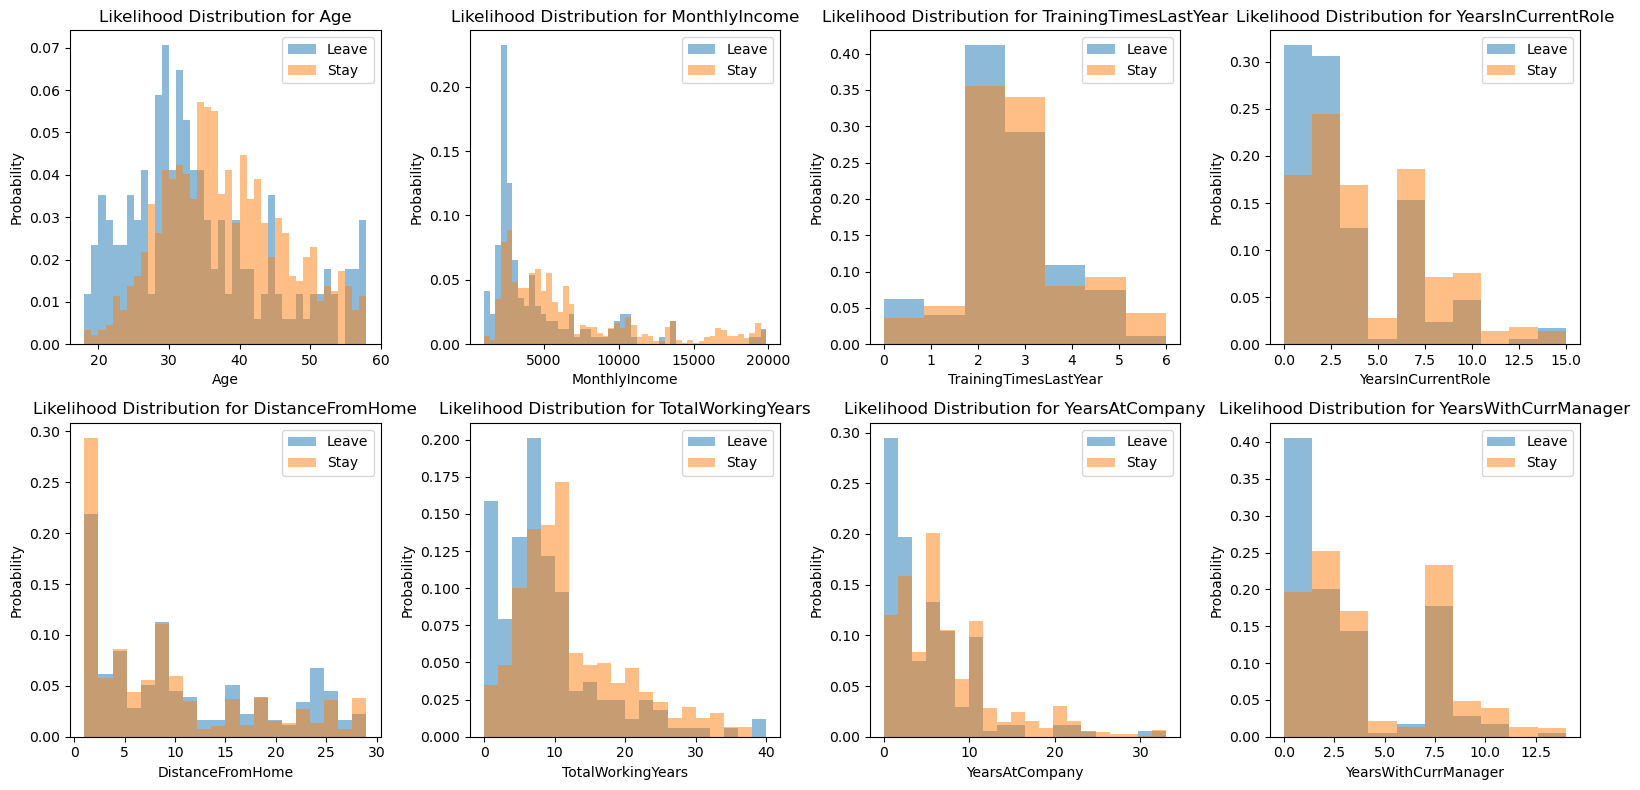

In [21]:
numaric_select_feature = ['Age','DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
bin_numaricfeature = [40, 20, 50, 20, 7, 20, 10, 10]
fig, axes = plt.subplots(int(len(numaric_select_feature)/4), int(len(numaric_select_feature)/2), figsize=(16, 8))
j = 0
k = 0

# Plot likelihood distributions for each column
for i, column in enumerate(numaric_select_feature):
    # Calculate histogram
    hist_leave, bin_edge = np.histogram(train_set[train_set['Attrition'] == 1][column].dropna(), bins=bin_numaricfeature[i] )
    hist_stay, _ = np.histogram(train_set[train_set['Attrition'] == 0][column].dropna(), bins=bin_edge)
    
    # Normalize the histograms to get probabilities
    probabilities_leave = hist_leave / np.sum(hist_leave)
    probabilities_stay = hist_stay / np.sum(hist_stay)
    
    # Plot the likelihood distributions on the corresponding subplot
    axes[j, k].bar(bin_edge[:-1], probabilities_leave, width=np.diff(bin_edge), align='edge', alpha=0.5, label='Leave')
    axes[j, k].bar(bin_edge[:-1], probabilities_stay, width=np.diff(bin_edge), align='edge', alpha=0.5, label='Stay')
    axes[j, k].set_title(f'Likelihood Distribution for {column}')
    axes[j, k].set_xlabel(column)
    axes[j, k].set_ylabel('Probability')
    axes[j, k].legend()
    
    j = j+1
    if j == 2:
        k = k+1
        j = 0

# Adjust layout and show plot
plt.tight_layout()
plt.show()

When plotting the graphs while separating different attrition values, it can be observed that the 'leave' and 'stay' categories show minor differences across all graphs. However, in the 'Age' and 'TotalWorkingYear' graphs, significant differences in the mean of the data can be seen. Plotting the graphs separately for different attrition values allows for the visualization of differences in the data across each feature and the characteristics of the data within each feature.

## **Naive Bayes classification**

We are now ready to build our Naive Bayes classifier. Which makes a decision according to 


$$ H(x) = \frac{p(leave)}{p(stay)}\prod_{i=1}\frac{p(x_i | leave)}{(x_i | stay)} $$

If H(x) is larger than 1, then classify it as leave. If H(x) is smaller than 1, then classify it as stay. 

$$ lH(x) = logp(leave) - logp(stay) + \sum_{i = 1}[logp(x_i | leave) - logp(x_i | leave)]$$

If lH(x) is larger than 0, then classify it as leave. If lH(x) is smaller than 0, then classify it as stay.

#### **6. If we use the current Naive Bayes with our current Maximum Likelihood Estimates,** we will find that some P (xi|attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem. 

Some p(xi|attrition) will be zero, resulting in the entire product term becoming zero. This can be addressed by using an extremely small value, such as 0.00001, to replace the range where the value is zero, allowing for continued computation and preventing the product term from being zero. However, this will result in a value that is very close to zero instead.

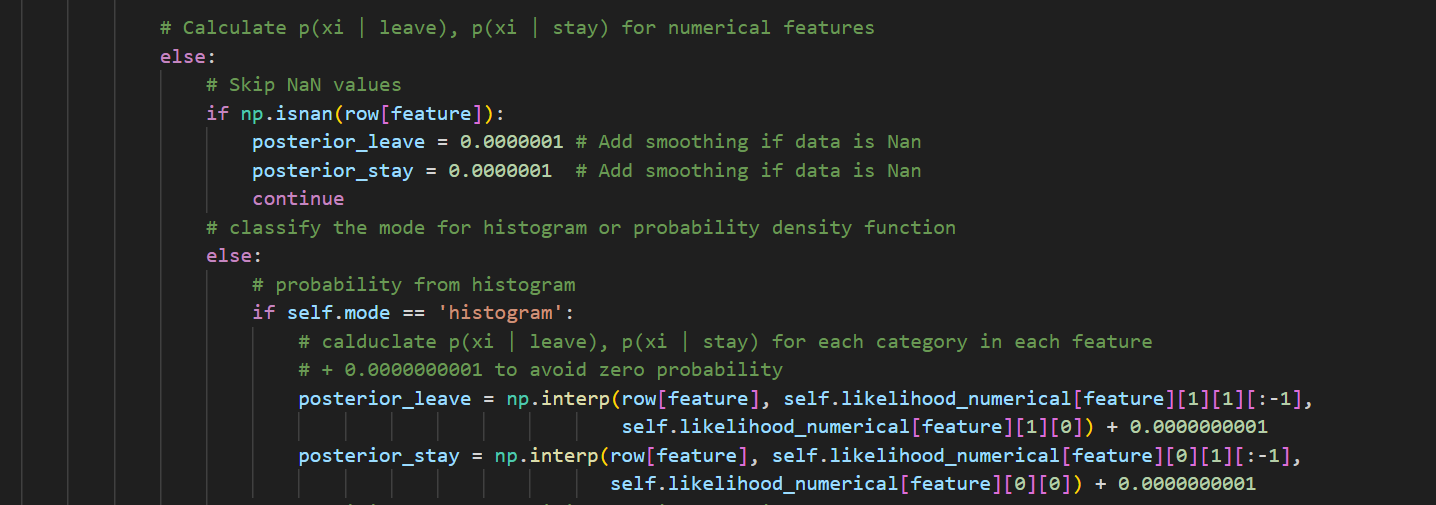

You can see from the code in the 'naivebayes.py' file that in lines 118-122, there is an addition of a very small value to address the problem of having p(xi|attrition)equal to zero. However, you can also use a check to replace p(xi|attrition) with an extremely small value if it equals zero.

Set up the mode for predict (Naive Bayes by histogram or probability density function)

**Function**
naivebayes.NaiveBayes(mode:str = 'histogram')

***Variable***
- **mode** : mode ('histogram' or 'pdf')

***Method***
- **fit(self, X_train, y_train, numeric_features, cat_features, bin:int)** --> Method for fit x_train when give X_train, y_train, numeric_features, cat_features and bin for use in histogram
- **predict(self, X_test, normal_tresholds=1, log_tresholds=0)** --> Return y predict from x_test follow by method

meaning of return from method predict
- **predictions :** Prediction from normal scale Naive Bayes (1,0) for all sample.
- **predictions_log :** Prediction from log scale Naive Bayes (1,0) for all sample.
- **h_x_list :** Value before predict by threshold of normal scale Naive Bayes for all sample.
- **log_h_x_list :** Value before predict by threshold of log scale Naive Bayes for all sample.

In [22]:
from naivebayes import NaiveBayes
# Define the columns to use for the Naive Bayes model
bin_numaricfeature = [40, 20, 50, 20, 7, 20, 10, 10]
df_use_numerical = ['Age','DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
df_use_categorical = ['BusinessTravel','Department','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobRole','MaritalStatus','OverTime','StockOptionLevel','WorkLifeBalance']
# Define the target variable
target = ['Attrition']
# Define the all columns to use
df_use = df_use_numerical + df_use_categorical + target 
# Select the columns to use
train_set = train_set[df_use]
test_set = test_set[df_use]

# Create a Naive Bayes model
nb = NaiveBayes()
nb.fit(train_set.drop(columns=['Attrition']), train_set['Attrition'], df_use_numerical, df_use_categorical,bin_numaricfeature)

# Make predictions on the train set
train_pred,train_pred_log,train_pred_list,log_train_pred_list = nb.predict(train_set.drop(columns=['Attrition']), 1,0)

# Make predictions on the test set
predictions,predictions_log,h_x_list,log_h_x_list = nb.predict(test_set.drop(columns=['Attrition']), 1,0)

True class "Attrition" of test set ('1' is leave and '0' is stay)

In [23]:
data = np.array(test_set[['Attrition']], dtype =int)
print(data)

[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]


#### **7. Implement your Naive Bayes classifier.** Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, **report the Precision, Recall, and F1 score for detecting attrition.** 

##### **normal scale in Naive Bayes**

In [24]:
print(train_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


Accuracy, Precision, Recall, and F1 score for detecting attrition of **train set**

In [25]:
data_1_validate_accuracy, data_1_validate_precision, data_1_validate_recall, data_1_validate_f1 = evaluation.classification_report(data, train_pred,"Matrix")

Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.7671232876712328
|            |    P    |    N    |
----------------------------------   Precision = 0.21052631578947367
|        | P |    4    |   19    |   Recall    = 0.17391304347826086
| Actual -------------------------
|        | N |   15    |   108   |   F1-score  = 0.1904761904761905
----------------------------------


Prediction attrition result of **test set**

In [26]:
print(predictions)

[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


Accuracy, Precision, Recall, and F1 score for detecting attrition of **test set**

In [27]:
data_1_validate_accuracy, data_1_validate_precision, data_1_validate_recall, data_1_validate_f1 = evaluation.classification_report(data, predictions,"Matrix")

Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.8013698630136986
|            |    P    |    N    |
----------------------------------   Precision = 0.3333333333333333
|        | P |    6    |   17    |   Recall    = 0.2608695652173913
| Actual -------------------------
|        | N |   12    |   111   |   F1-score  = 0.2926829268292683
----------------------------------


Plot the graphs while varying the threshold from 0 to 3. Observe the values of Accuracy, Precision, Recall, and F1 score, as well as their trends, to determine the most suitable threshold. Additionally, analyze the characteristics of the predicted values.

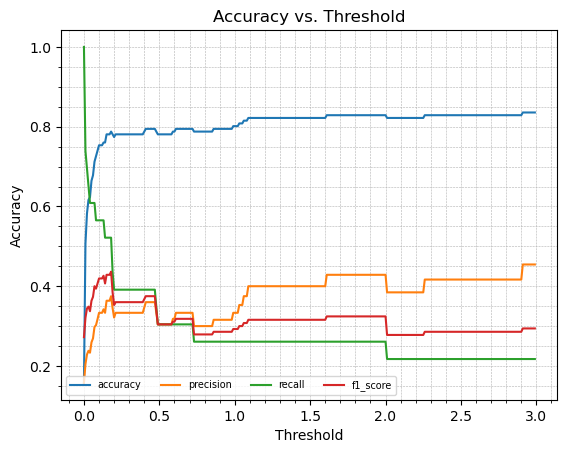

In [28]:
accuracy = []
precision = []
recall = []
f1_score = []

thresholds = np.arange(0, 3, 0.01)  # Vary threshold from 0 to 3 in steps of 0.01

for threshold in thresholds:
    predictions,predictions_log,h_x_list,log_h_x_list = nb.predict(test_set.drop(columns=['Attrition']), threshold,0)
    data_23_train_accuracy, data_23_train_precision, data_23_train_recall, data_23_train_f1 = evaluation.classification_report(data, predictions)
    accuracy.append(round(data_23_train_accuracy, 4))
    precision.append(round(data_23_train_precision, 4))
    recall.append(round(data_23_train_recall, 4))
    f1_score.append(round(data_23_train_f1, 4))
    

plt.plot(thresholds, accuracy, label="accuracy") 
plt.plot(thresholds, precision, label="precision")
plt.plot(thresholds, recall, label="recall")
plt.plot(thresholds, f1_score, label="f1_score")
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth=0.4, which='both')
plt.minorticks_on()
plt.grid(True, linestyle='--', linewidth=0.4, which='minor')
plt.title('Accuracy vs. Threshold')
leg = plt.legend(loc='lower left', fontsize=7, ncol=4)
plt.show()

##### **log scale in Naive Bayes**

In [29]:
print(train_pred_log)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [30]:
data_1_validate_accuracy, data_1_validate_precision, data_1_validate_recall, data_1_validate_f1 = evaluation.classification_report(data, train_pred_log,"Matrix")

Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.7671232876712328
|            |    P    |    N    |
----------------------------------   Precision = 0.21052631578947367
|        | P |    4    |   19    |   Recall    = 0.17391304347826086
| Actual -------------------------
|        | N |   15    |   108   |   F1-score  = 0.1904761904761905
----------------------------------


Prediction attrition result of **test set**

In [31]:
print(log_h_x_list)
print(predictions_log)

[2.006822716041634, 3.9622014931084464, -2.0780601170658883, 5.796338803447426, -2.893039744748302, -21.88035629988398, -3.94688925653981, -3.768709353358789, -1.9255048547809348, -2.5553493240520213, 2.139673012138493, -5.575665165327955, -4.945513572628014, -3.909675461821845, 0.8112615863650081, 0.4741596826250185, -6.81153538076445, -23.108452468192827, -5.364128802685061, -2.801599085003326, -5.906171044621734, -6.879243228859467, 4.813251366902433, -2.775770115029168, 1.1577758924893815, -3.350784308653498, -5.610358126772092, -5.265901545877722, -9.73310427128966, -0.7214590587370826, -3.8587095234337547, -2.462533502682464, -2.6027162418280887, -8.219281383376511, -4.2647531579504525, -3.2810465687175707, -2.7037878999192886, -4.724135979500879, -7.624400283466263, -7.71726059090062, -3.205741779082352, -26.346233415949758, -5.388049137796987, 1.2746401876748856, -4.710616254398028, 5.1413885858661725, -0.8943925062499215, -7.397166612749464, -3.9659804085598536, -7.24182399758

Accuracy, Precision, Recall, and F1 score for detecting attrition when use log scale in Naive Bayes

In [32]:
data_1_validate_accuracy, data_1_validate_precision, data_1_validate_recall, data_1_validate_f1 = evaluation.classification_report(data, predictions_log,"Matrix")

Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.8013698630136986
|            |    P    |    N    |
----------------------------------   Precision = 0.3333333333333333
|        | P |    6    |   17    |   Recall    = 0.2608695652173913
| Actual -------------------------
|        | N |   12    |   111   |   F1-score  = 0.2926829268292683
----------------------------------


Plot the graphs while varying the threshold from -1 to 1. Observe the values of Accuracy, Precision, Recall, and F1 score, as well as their trends, to determine the most suitable threshold. Additionally, analyze the characteristics of the predicted values.

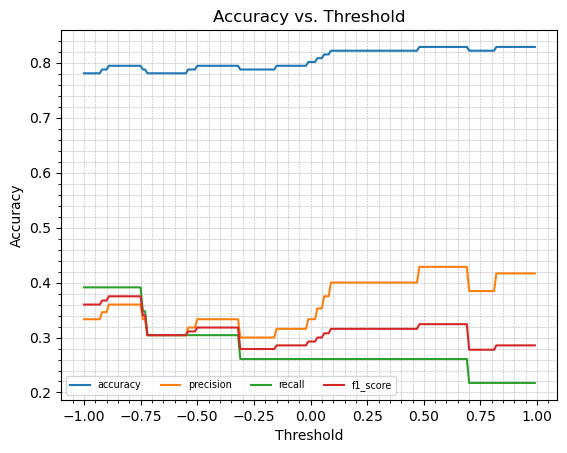

In [33]:
accuracy = []
precision = []
recall = []
f1_score = []

thresholds = np.arange(-1, 1, 0.01)  # Vary threshold from -1 to 1 in steps of 0.01

for threshold in thresholds:
    predictions,predictions_log,h_x_list,log_h_x_list = nb.predict(test_set.drop(columns=['Attrition']), 1,threshold)
    data_23_train_accuracy, data_23_train_precision, data_23_train_recall, data_23_train_f1 = evaluation.classification_report(data, predictions_log)
    accuracy.append(round(data_23_train_accuracy, 4))
    precision.append(round(data_23_train_precision, 4))
    recall.append(round(data_23_train_recall, 4))
    f1_score.append(round(data_23_train_f1, 4))
    

plt.plot(thresholds, accuracy, label="accuracy") 
plt.plot(thresholds, precision, label="precision")
plt.plot(thresholds, recall, label="recall")
plt.plot(thresholds, f1_score, label="f1_score")
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth=0.4, which='both')
plt.minorticks_on()
plt.grid(True, linestyle='--', linewidth=0.4, which='minor')
plt.title('Accuracy vs. Threshold')
leg = plt.legend(loc='lower left', fontsize=7, ncol=4)
plt.show()

From the prediction results of both the train set and test set, it is evident that they exhibit very similar outcomes in terms of Accuracy, Precision, Recall, and F1 score. **The Accuracy, in particular, is relatively high around 0.80**. However, on the contrary, **Precision, Recall, and F1 scores have much lower values**, ranging from approximately 0.2 to 0.3. This indicates that the model is not performing as well as expected. The reason for the higher Accuracy compared to Precision, Recall, and F1 scores is clearly attributed to the **imbalance in the data**. This can be observed from the comparison graph of the data in the 'Attrition' feature, where the 'stay' class significantly outweighs the 'leave' class, by up to 5.20 times. Consequently, the model tends to predict class 0 or 'stay' more frequently.

When comparing the use of Naive Bayes with log scale and without log scale, it is evident that when using a threshold for log scale = 0 and a threshold for normal scale = 1, they yield identical values. Whether it is **the predicted class or metrics such as Accuracy, Precision, Recall, and F1 score, they all have similar values**. The only difference is that using log scale reduces the processing time.

## **Probability density function**  

#### 8. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.

In [34]:
nb = NaiveBayes(mode = 'pdf')
nb.fit(train_set.drop(columns=['Attrition']), train_set['Attrition'], df_use_numerical, df_use_categorical)
predictions,h_x = nb.predict(test_set.drop(columns=['Attrition']))

print(predictions)
print(h_x)

[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[0.7646166191041206, 1.0067716119378614, -1.3622799388725133, 3.6005621829685572, -3.0571675553555435, -0.3921139918475054, -2.762751818156881, -3.3387119739002644, -0.5546076741972075, -0.30666853589619514, 0.7389116311636532, -2.509651613039418, -4.437859662079038, -

Accuracy, Precision, Recall, and F1 score for detecting attrition when use probability density function.

In [35]:
data_1_validate_accuracy, data_1_validate_precision, data_1_validate_recall, data_1_validate_f1 = evaluation.classification_report(data, predictions,"Matrix")

Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.7808219178082192
|            |    P    |    N    |
----------------------------------   Precision = 0.2857142857142857
|        | P |    6    |   17    |   Recall    = 0.2608695652173913
| Actual -------------------------
|        | N |   15    |   108   |   F1-score  = 0.2727272727272727
----------------------------------


From the results obtained, it can be observed that both Accuracy, Precision, Recall, and F1 score have values close to those of using Naive Bayes. Accuracy is relatively high. Conversely, Precision, Recall, and F1 score have much lower values, similar to Naive Bayes. This is likely due to the imbalance in the data, similar to the Naive Bayes model.